In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/gdrive/MyDrive/dataset/"

In [ ]:
df_email1 = pd.read_csv(path + 'user_email_count.csv')
df_email1.drop(df_email1.iloc[:, 0:1], inplace = True, axis = 1)


In [ ]:
df_email1

,user,email,count
0,AAB0754,dtaa.com,2100
1,AAB0754,aol.com,85
2,AAB0754,sbcglobal.net,74
3,AAB0754,cox.net,27
4,AAB0754,optonline.net,25
...,...,...,...
17949,ZXA0931,gmail.com,1
17950,ZXA0931,harris.com,1
17951,ZXA0931,juno.com,1
17952,ZXA0931,raytheon.com,1


In [ ]:
df_email = df_email1.copy()

In [ ]:
df_email['email'].unique()

array(['dtaa.com', 'aol.com', 'sbcglobal.net', 'cox.net', 'optonline.net',
       'charter.net', 'hp.com', 'hotmail.com', 'gmail.com', 'harris.com',
       'boeing.com', 'juno.com', 'msn.com', 'raytheon.com', 'verizon.net',
       'bellsouth.net', 'earthlink.net', 'comcast.net',
       'northropgrumman.com', 'yahoo.com', 'netzero.com', 'lockheed.com'],
      dtype=object)

In [ ]:
len(df_email['email'].unique())

22

In [ ]:
df_encoded = pd.get_dummies(df_email, columns={'email'}, prefix='email',drop_first=True)

In [ ]:
columns = df_encoded.columns
columns

Index(['user', 'count', 'email_bellsouth.net', 'email_boeing.com',
       'email_charter.net', 'email_comcast.net', 'email_cox.net',
       'email_dtaa.com', 'email_earthlink.net', 'email_gmail.com',
       'email_harris.com', 'email_hotmail.com', 'email_hp.com',
       'email_juno.com', 'email_lockheed.com', 'email_msn.com',
       'email_netzero.com', 'email_northropgrumman.com', 'email_optonline.net',
       'email_raytheon.com', 'email_sbcglobal.net', 'email_verizon.net',
       'email_yahoo.com'],
      dtype='object')

In [ ]:
del df_email['email']

In [ ]:
df_email[columns] = df_encoded


In [ ]:
df_email

,count,email_bellsouth.net,email_boeing.com,email_charter.net,email_comcast.net,email_cox.net,email_dtaa.com,email_earthlink.net,email_gmail.com,email_harris.com,email_hotmail.com,email_hp.com,email_juno.com,email_lockheed.com,email_msn.com,email_netzero.com,email_northropgrumman.com,email_optonline.net,email_raytheon.com,email_sbcglobal.net,email_verizon.net,email_yahoo.com
0,2100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17950,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
17951,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17952,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
user_email_count_matrix = np.matrix(df_email)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
        verbose=0)
forest.fit(user_email_count_matrix)
user_email_ascore = forest.decision_function(user_email_count_matrix)
user_email_ascore[:10]

array([-0.00091651,  0.09098883,  0.02299133,  0.02574486,  0.00633603,
        0.03362326,  0.01524831,  0.0170261 ,  0.00363109,  0.02685167])

In [ ]:
df_user_email_result = pd.DataFrame()
df_user_email_result['user_id'] = df_email1['user']
df_user_email_result['ascore'] = user_email_ascore
print(df_user_email_result)

       user_id    ascore
0      AAB0754 -0.000917
1      AAB0754  0.090989
2      AAB0754  0.022991
3      AAB0754  0.025745
4      AAB0754  0.006336
...        ...       ...
17949  ZXA0931  0.001190
17950  ZXA0931  0.022969
17951  ZXA0931  0.034535
17952  ZXA0931  0.020676
17953  ZXA0931  0.018590

[17954 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7b5ae7590>]],
      dtype=object)

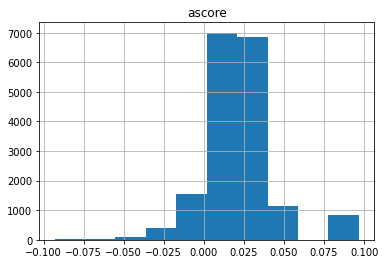

In [ ]:
df_user_email_result.hist()